# Chapter 7 신경망, 딥러닝
-------------------

#### 머신러닝(지도학습)의 분류
- 신경망 모델은 머신러닝의 한 방법이다.
- 딥러닝(심층 학습)은 층을 많이 활용한 신경망 모델을 뜻한다.
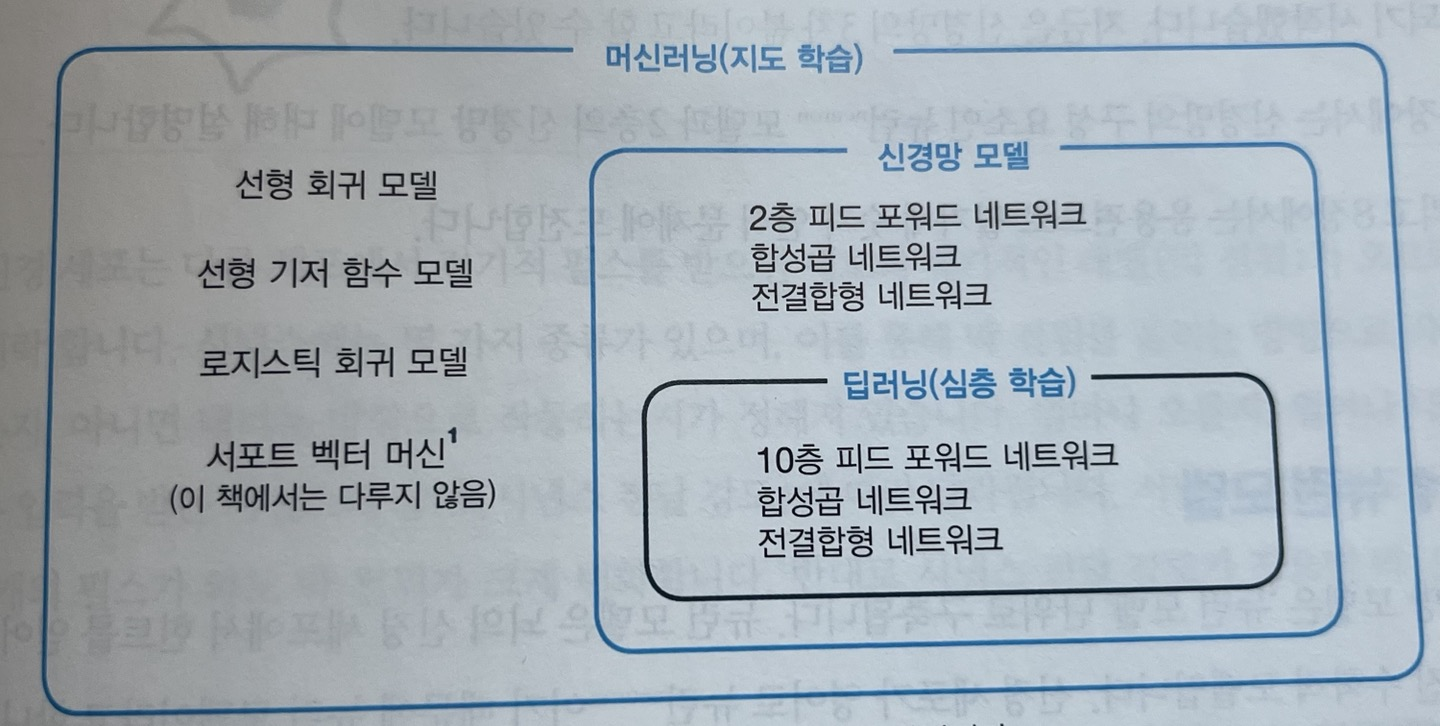

### 7.1 뉴런 모델

- 신경망 모델은 뉴런 모델 단위로 구축됨
- 뉴런 모델은 뇌의 신경 세포에서 힌트를 얻어 만들어진 수학적 모델
- 신경 세포가 영어로 neuron이기 때문에 뉴런 모델이라고 함

#### 7.1.1 신경 세포
- 신경 세포는 축삭 이라는 케이블을 갖고 있고 이 축삭을 사용하여 전기적 펄스를 다른 신경 세포에 전달한다.
- 우리의 학습은 다양한 신경 세포 간의 시냅스 전달 강도가 변화하여 일어난다고 생각할 수 있다.
- 언어를 배우고, 최근의 사건ㅇ르 자연스롭게 기억하고, 자전거에 타는 법을 시행착오를 통해 배울 수 있는 것처럼 이러한 여러 학습은 각각을 담당하는 뇌 부위에서 시냅스 전달 강도가 변화하여 일어나고 있다고 생각되고 있다.

#### 7.1.2 뉴런 모델
- 신경 세포의 움직임을 단순화한 수학적 모델인 뉴런 모델을 설명한다.
- 뉴런에 2개의 입력 $x = (x_0, x_1)$ 이 들어오는 것을 가정한다. 
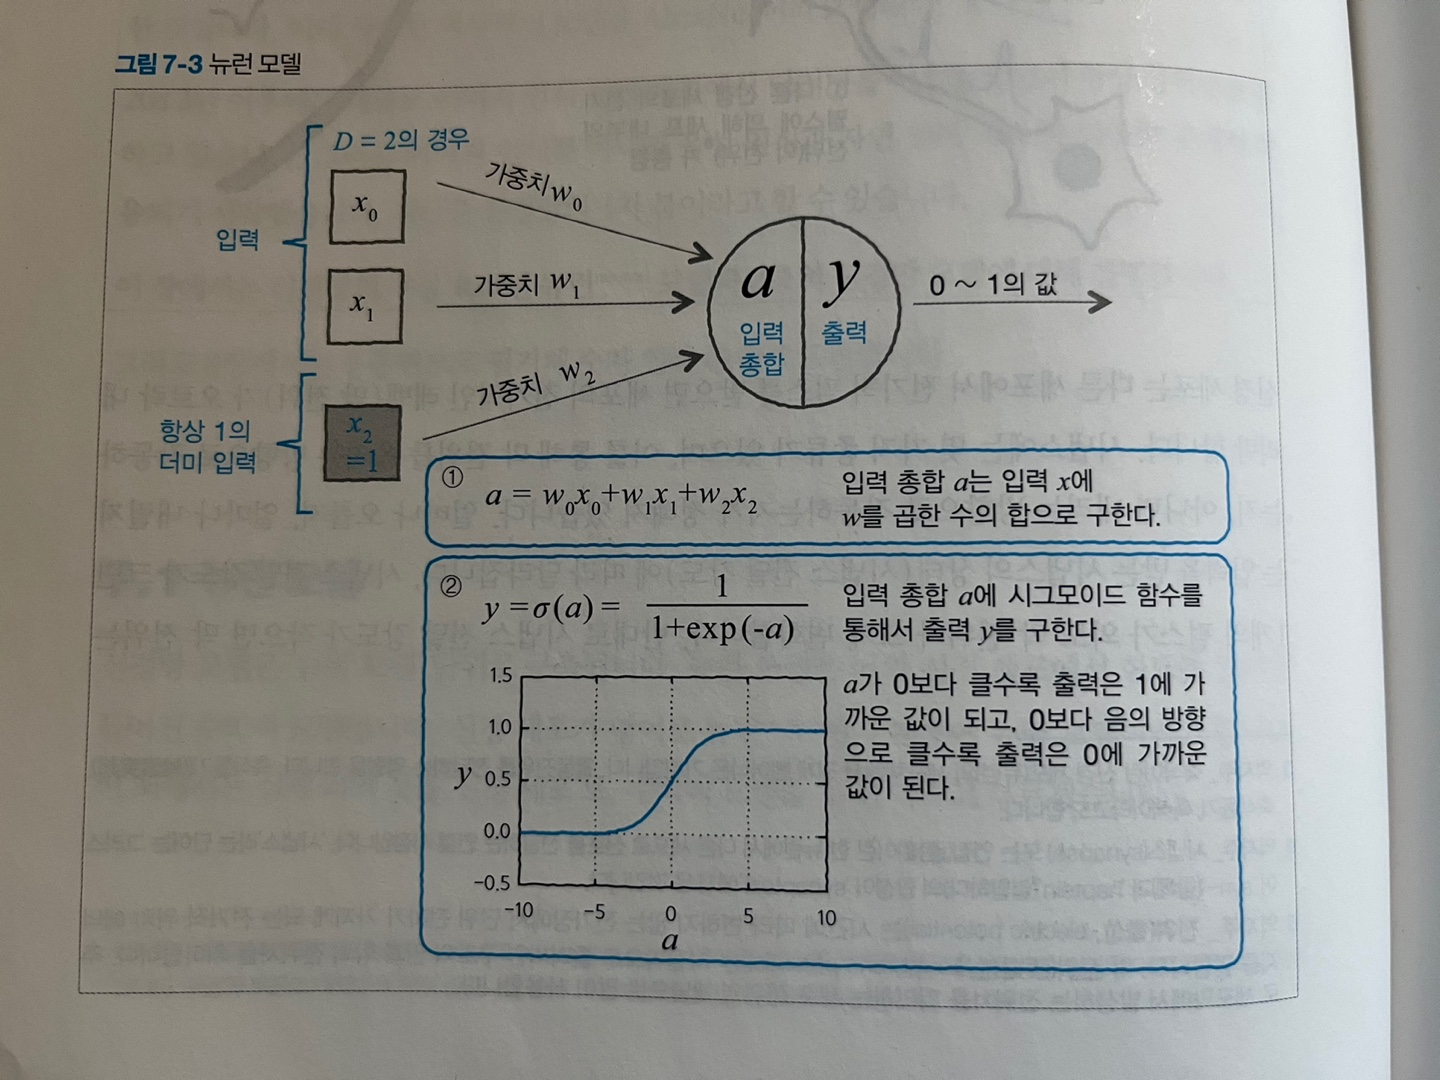

입력 값은 양수와 음수 값을 갖을 수 있는 실수로 한다.
각각의 입력에 대한 시냅스 전달 강도를 $W_0, w_1$로 하여 이들을 곱하여 모든 입력으로 합을 얻은 상수 $W_2$를 더한 것을 입력 총합 $\alpha$로 한다. 

$$ \alpha = w_0x_0 + w_1x_1 + w_2 $$

w는 매개 변수(바이어스 매개 변수, 바이어스 항)이다. 그리고 항상 1을 갖는 3번째 입력 x2가 있다고 가정하여

$$ \alpha = w_0x_0 + w_1x_1 + w_2x_2 $$

다음과 같은 식을 만들 수 있고, 이를 정리하면 다음과 같다.

$$ \alpha =\displaystyle\sum_{i=0}^{2}w_ix_i $$

이 때 x2를 더미 입력(바이어스 입력)이라고 한다. 입력 총합 $\alpha$에 시그모이드 함수에 적용시켜 뉴련의 출력값을 y로 하면 다음과 같다.

$$ y = \frac {1}{1+ exp(-\alpha)} $$

- y는 0부터 1까지 연속된 값을 갖는다.
- 여기서는 출력 값은 단위 시간당 펄스 수, 즉 발화의 빈도를 나타내고 있다고 생각하자
- $\alpha$가 클수록 발화 빈도는 한계값인 1에 가까워지고, 반대로 $\alpha$가 음의 큰 값을 취할수록 발화 빈도는 0에 가까워지며 거의 발화하지 않은 상태가 된다.
- 이 모델을 로지스틱 회귀 모델이라고 한다. 
- 즉, 이 뉴런 모델은 2차원의 입력 공간 (x0 , x1)을 직선으로 나누어 한쪽에 0에서 0.5의 값을, 다른 한쪽에는 0.5에서 1 사이의 숫자를 할당하는 기능을 갖는다. 

### 7.2 신경망 모델
#### 7.2.1 2층 피드 포워드 신경망
- 뉴런 모델은 입력 공간을 선으로 나눈다는 단순한 기능밖에 없지만 이를 많이 조합하여 신경망 모델을 만들 수 있다.
- 다양한 구조와 기능이 있지만 여기서는 신호가 되돌아가는 경로가 없이, 한 방향으로만 흐르는 피드 포워드 신경망을 고려한다.

#### 7.2.2 2층 피드 포워드 신경망의 구현
- 먼저 사용할 데이터를 [리스트 7-1(1)] 에서 만든다.(6장에서 3개의 클래스 분류에 사용한 데이터와 동일)


In [1]:
#-- 리스트 7-1-(1)
import numpy as np
# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정
N = 200 # 데이터의 수
K = 3 # 분포의 수
T = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3] # X0의 범위, 표시용
X_range1 = [-3, 3] # X1의 범위, 표시용
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # 각 분포에 대한 비율
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T[n, k] = 1
            break
    for k in range(2):
        X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k] + \
        Mu[T[n, :] == 1, k]

C:\anaconda3\envs\tens2\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\anaconda3\envs\tens2\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\anaconda3\envs\tens2\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


- 이 데이터를 X_train, T_train, X_test, T_test로 나누어둔다.(overfitting이 일어나고 있는지 확인하기 위함)


In [2]:
#-- 리스트 7-1-(2)
# -------- 2 분류 데이터를 테스트 훈련 데이터로 분할
TestRatio = 0.5
X_n_training = int(N * TestRatio)
X_train = X[:X_n_training, :]
X_test = X[X_n_training:, :]
T_train = T[:X_n_training, :]
T_test = T[X_n_training:, :]


# -------- 데이터를 'class_data.npz'에 저장
np.savez('class_data.npz', X_train=X_train, T_train=T_train,
         X_test=X_test, T_test=T_test,
         X_range0=X_range0, X_range1=X_range1)

- 분할한 데이터를 [리스트 7-1-(3)]으로 시각화함
- **Show_data(x,t)** 는 분포 표시용의 함수를 만들고, 훈련 데이터도 테스트 데이터에서 공통으로 사용할 수 있도록 함

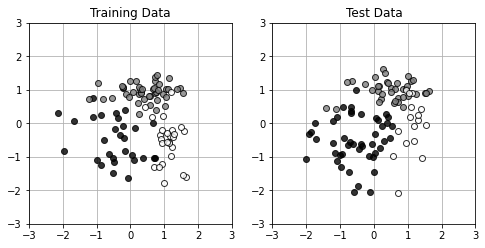

In [3]:
#-- 리스트 7-1-(3)
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터를 그리기 ------------------------------
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1],
                 linestyle='none',
                 marker='o', markeredgecolor='black',
                 color=c[i], alpha=0.8)
    plt.grid(True)


# 메인 ------------------------------------
plt.figure(1, figsize=(8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1, 2, 2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()

- 데이터를 준비했으므로 네트워크를 만듦. 그리고 이 네트워크에서 3클래스 분류 문제가 풀릴 것인지 확인하.ㅁ
- 2층의 피드 포워드 신경망을 정의하는 함수를 FNN이라고 했다.
- FNN은 네트워크의 입력 x를 받아 y를 출력한다.
- 입력 x는 D차원 벡터이며, 출력 y는 k차원 벡터이다.
- 여기서는 D=2, K=3으로 진행된다.

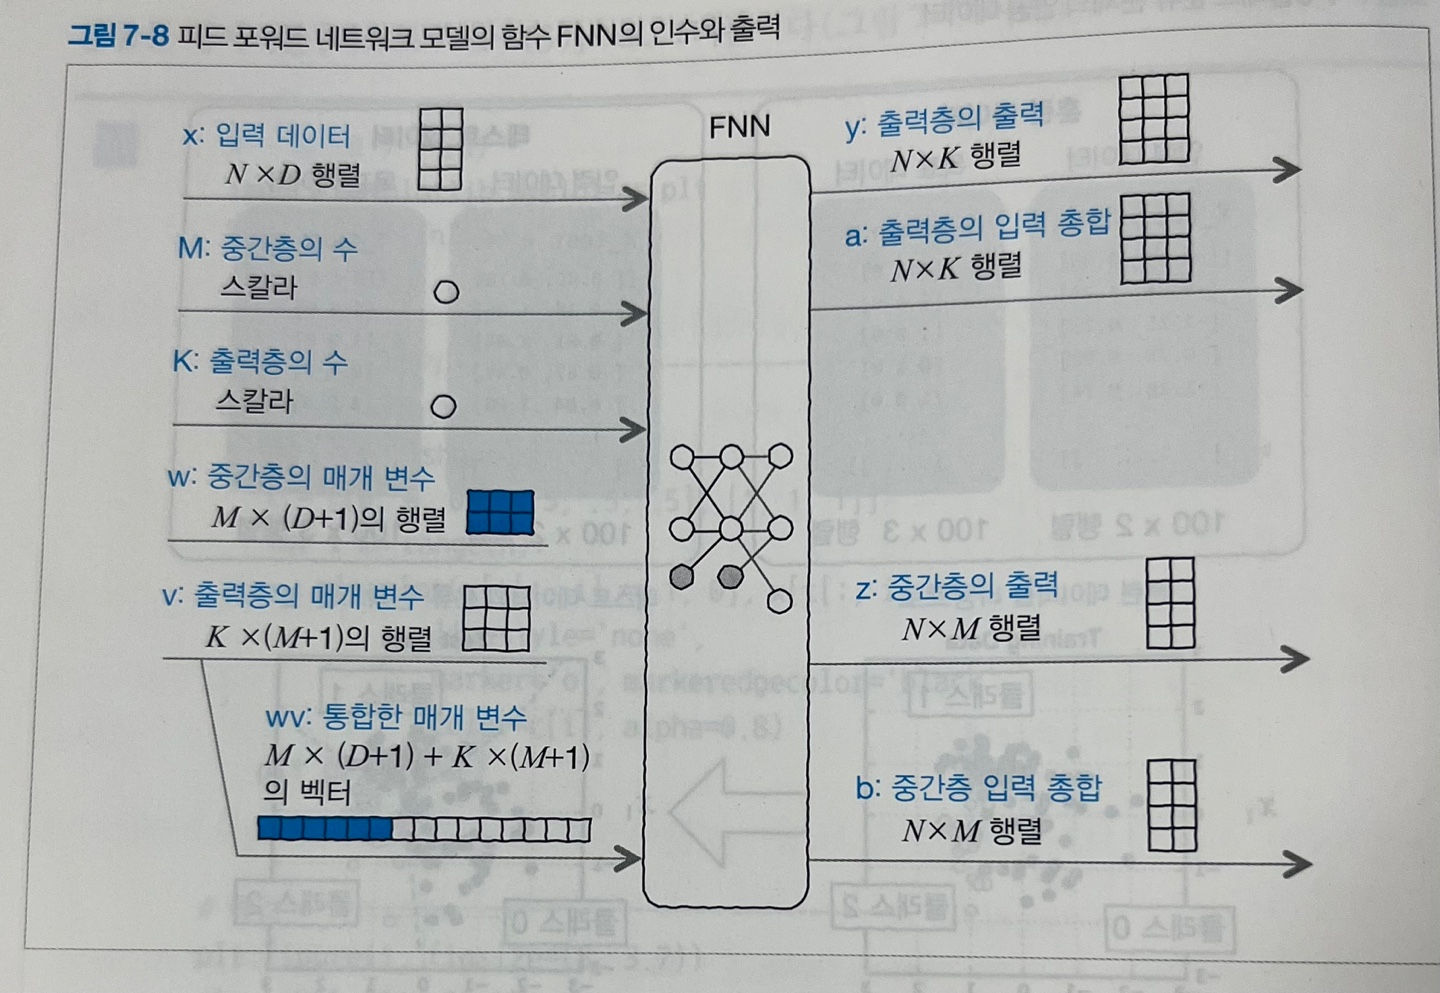

- 네트워크 함수는 N개의 데이터를 한꺼번에 처리할 수 있도록 설계함
- x를 데이터 수 NXD 차원의 행렬로, y를 데이터 수 NXK차원의 행렬로 한다.
- 벡터 y의 요소 y[n,0], y[n,1], y[n,2], x[n,:]이 클래스 0,1,2에 속해 있을 가능성을 나타냄
- 모두 더하면 1이 되는 제약이 있음
- 중간층의 수와 출력의 차원도 자유롭게 바꿀 수 있도록 각각을 M,K로 하여 네트워크의 인수로 한다. (N과 D는 입력 데이터 x의 차원에서 알 수 있으므로 인수에는 들어가지 않는다.)

- 네트워크의 동작을 결정하는 중요한 매개 변수인 중간층 가중치 W와 출력층 가중치 V도 네트워크에 전달한다.
- W는 M X (D+!)의 행렬(바이어스 입력에서 가중치도 있으므로 D+!) 이며, V는 K x (M+1) 의 행렬이다. (이것도 중간층의 바이어스 뉴런을 고려하여 M+!)이 된다.
- W와 V의 정보는 W와 V를 한 덩어리로 한 벡터 WV로 전달한다. 
- 예를 들어 중간층 뉴런 수 M=2, 출력 차수 k=3의 경우를 상정하여 다음 가중치를 네트워크에 전달하고자 한다.

 $W= \begin{bmatrix} 0 & 1 & 2 \\ 3 & 4 & 5 \end{bmatrix}$  

 $V= \begin{bmatrix} 6 & 7 & 8 \\ 9 & 10 & 11 \\ 12 & 13& 14 \end{bmatrix} $ 
 
 $M x (D+1) = 2 x 3 $
 
 $ k x (M+1) = 3x3 $
 
 그리고 이 경우 w,v는 다음과 같이 설정한다.
 **wv = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
 
 - wv의 길이는 Mx(D+1) + Kx(M+1) 이다. 
 - FNN의 출력은 N개의 데이터에 대응한 출력 y (NXK행렬)와 중간층의 출력 X, 출력층과 중간층의 입력 총합 a,b도 출력한다.
 이 정보는 wv를 학습시킬 때 사용한다. 

In [4]:
# 리스트 7-1-(4)
# 시그모이드 함수 ------------------------
def Sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y


# 네트워크 ------------------------
def FNN(wv, M, K, x):
    N, D = x.shape # 입력 차원
    w = wv[:M * (D + 1)] # 중간층 뉴런의 가중치
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):] # 출력층 뉴런의 가중치
    v = v.reshape((K, M + 1))
    b = np.zeros((N, M + 1)) # 중간층 뉴런의 입력 총합
    z = np.zeros((N, M + 1)) # 중간층 뉴런의 출력
    a = np.zeros((N, K)) # 출력층 뉴런의 입력 총합
    y = np.zeros((N, K)) # 출력층 뉴런의 출력
    for n in range(N):
        # 중간층의 계산
        for m in range(M):
            b[n, m] = np.dot(w[m, :], np.r_[x[n, :], 1]) # (A)
            z[n, m] = Sigmoid(b[n, m])
        # 출력층의 계산
        z[n, M] = 1 # 더미 뉴런
        wkz = 0
        for k in range(K):
            a[n, k] = np.dot(v[k, :], z[n, :])
            wkz = wkz + np.exp(a[n, k])
        for k in range(K):
            y[n, k] = np.exp(a[n, k]) / wkz
    return y, a, z, b


# test ---
WV = np.ones(15)
M = 2
K = 3
FNN(WV, M, K, X_train[:2, :]) #동작 체크
#M=2, k=3으로 하여 , w는 길이가 2x3+3x3 = 15인 가중치 벡터이다.

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

- w의 요소 모두 1로 하여, 입력으로 X_train의 두 데이터만 입력했을 때의 출력이 표시됨
- 위에서부터 y,a,z,b의 값이다. 
- 두 데이터만 넣어서 모든 행렬은 두 줄의 행렬이 됨
-(A)에서 np.r_[x[n,:],1] 부분은 항상 1이 되는 더미 입력을 x의 3번째 요소로 덧붙인 부분
- np.r_[A,B]는 행렬을 옆으로 연결시키는 명령

#### 7.2.3 수치 미분법
- 2층의 피드 포워드 네트워크에서 3분류 문제 풀기를 생각한다.
- 우선 분류 문제이므로 오차 함수는 평균 교차 엔트로피 오차를 사용한다.
- 이 평균 교차 엔트로피 오차를 다음의 CE_FNN 함수로 구현한다

In [5]:
# 리스트 7-1-(5)
# 평균 교차 엔트로피 오차 ---------
def CE_FNN(wv, M, K, x, t):
    N, D = x.shape
    y, a, z, b = FNN(wv, M, K, x)
    ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)) / N
    return ce


# test ---
WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :])

1.0986122886681098

- CE_FNN은 FNN과 마찬가지로 매개 변수 w와 v를 붙인 wv를 입력한다.
- 또 네트워크의 크기를 결정하는 M과 K, 그리고 입력 데이터 x와 목표 데이터 t를 입력한다.
- 내부에서 FNN이 x에 대한 y를 출력하고, y와 t를 비교하여 크로스 엔트로피가 계산된다.

- 동작 체크는 M=2, K=3을 상정하고, wv의 길이는 2x3+3x3 = 15인 벡터로 한다.
- 이 모든 요소를 1로 하여 데이터 x,t는 훈련 데이터의 처음 두 개를 사용한 경우 출력이 표시된다. 

--------
 - 경사 하강법을 적용하려면 오차 함수를 매개 변수로 편미분한 식이 필요하지만, 사실은 이 미분 계산을 성실하게 하지 않고도, 계산 속도에 신경쓰지 않는다면 간단히 수치적 미분과 마찬가지의 값을 구할 수 있다.
 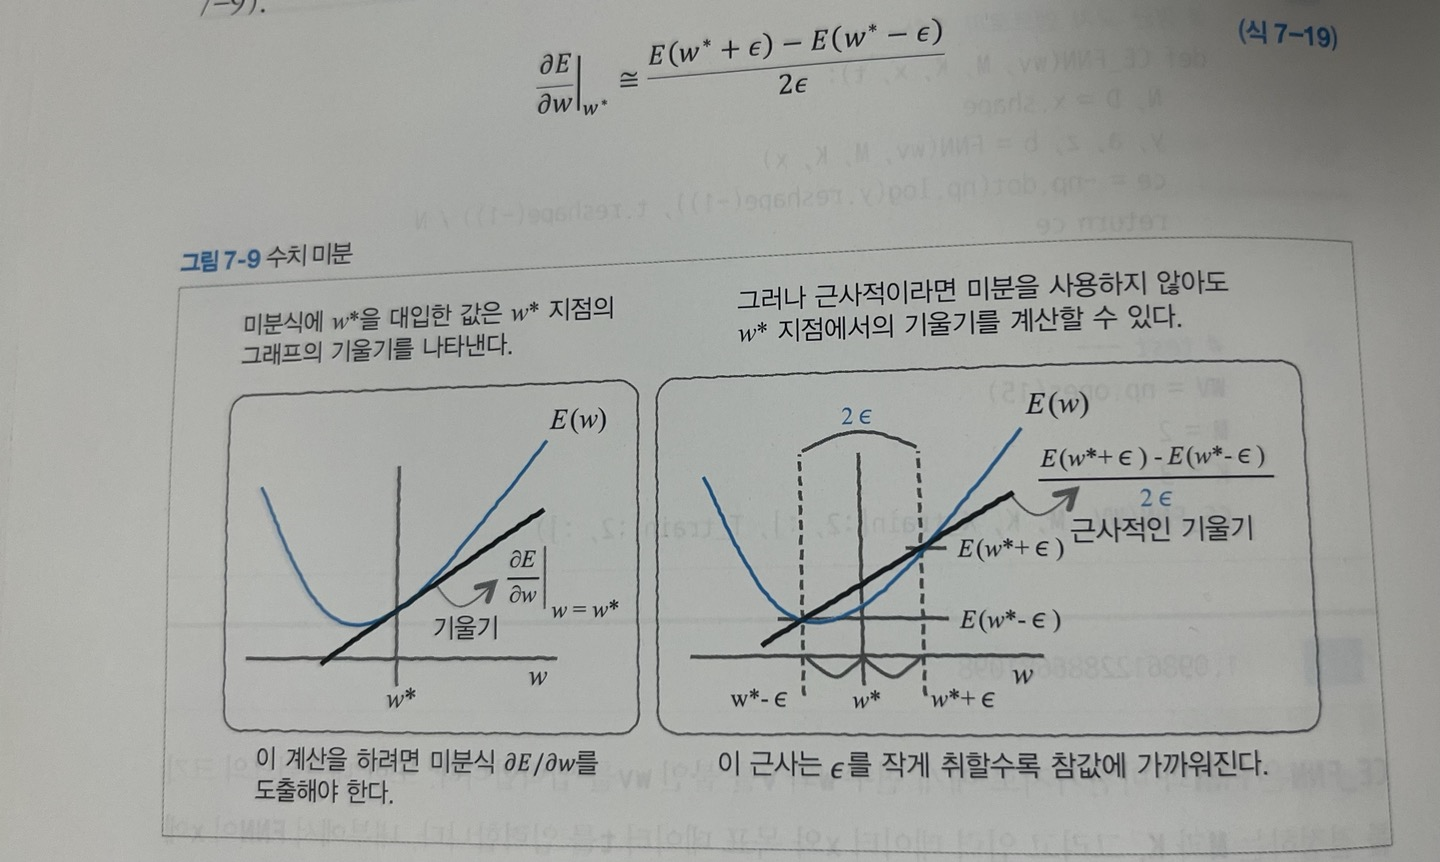

- 그런데 실제로 매개변수는 하나가 아니라 여러 개다. 예를 들어, 매개 변수가 $W_0, w_1, w_2$의 3개라고 했을 때 , 현재의 $w^*_0, w^*_1, w^*_2$는 그대로 고정하여 $w^*_0$의 전후로 오차 만큼 비켜 놓은 두 점의 기울기, w0에 대한 편미분을 근사한다. 

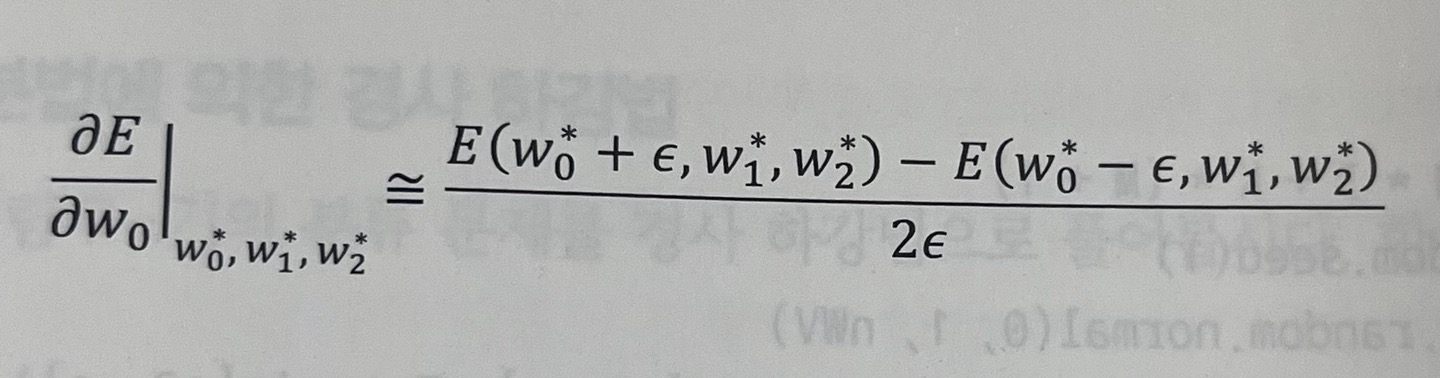

- w1, w2에 관해서도 마찬가지로 그 외의 매개 변수를 고정하여 편미분을 구한다.
- 직감적으로 매개 변수 공간의 현재 있는 지점에서 그 근방 오차 함수의 크기를 찾아보고, 오차 함수가 어느 방향으로 기울어져 있는지를 확인하는 방법이다.
- 이 방법은 어디까지나 근사이지만 , $\epsilon$ 를 충분히 작게 취하는 것으로, 근사치는 실제 값에 충분히 가까워진다.
- 이 방법의 단점은 정밀도 보다는 계산 비용에 있는데, 한 매개 변수의 미분을 계산하기 위한 매개 변수 하나에 두 번의 E의 계산이 필요하기 때문
- CE_FNN의 수치 미분을 출력하는 함수 dCE_FNN_num을 만듦

[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


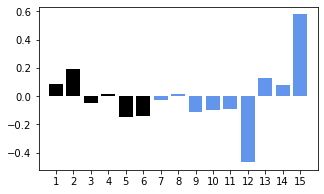

In [6]:
# 리스트 7-1-(6)
# - 수치 미분 ------------------
def dCE_FNN_num(wv, M, K, x, t):
    epsilon = 0.001
    dwv = np.zeros_like(wv)
    for iwv in range(len(wv)):
        wv_modified = wv.copy()
        wv_modified[iwv] = wv[iwv] - epsilon
        mse1 = CE_FNN(wv_modified, M, K, x, t)
        wv_modified[iwv] = wv[iwv] + epsilon
        mse2 = CE_FNN(wv_modified, M, K, x, t)
        dwv[iwv] = (mse2 - mse1) / (2 * epsilon)
    return dwv


#--dVW의 표시 ------------------
def Show_WV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3], align="center", color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:],
            align="center", color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)


#-test----
M = 2
K = 3
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)
dWV = dCE_FNN_num(WV, M, K, X_train[:2, :], T_train[:2, :])
print(dWV)
plt.figure(1, figsize=(5, 3))
Show_WV(dWV, M)
plt.show()

- $\epsilon$ 는 프로그램에서 epsilon = 0.001로 정의했다.
- M=2, K=3으로 가중치를 임의로 생성하여 X_train, T_train의 두 데이터만 입력했을 때 동작 체크의 출력이 표시된다.
- 15개의 가중치 매개변수 각각에 대한 수치 미분 값이다.
- 함수 Show_WV를 만들어 매개 변수의 값을 막대 그래프로 표시했다. (추후 해석해와 비교 예정)

##### 7.2.4 수치 미분법에 의한 경사 하강법
- 이제 이 함수로 분류 문제를 경사하강법으로 풀어보자.
- 함수명은 Fit_FNN_num으로 한다.

**Fit_FNN_num(wv_init, M, k, x_train, t_train, x_test, t_test, n, alpha)**

- 지금까지와는 다른 부분은 입력에 학습시키는 가중치의 초기 값으로 wv_init을 넣는다는 것이다.
- 또 훈련 데이터 뿐만 아니라 테스트 데이터도 입력한다.
- 이는 학습 단계별로 테스트 데이터의 오차도 체크해 오버피팅이 일어나고 있지 않은지 확인하기 위함이다.
- 물론 테스트 데이터의 정보는 매개 변수의 학습에는 사용핮 ㅣ않는다.
- n은 학습 단계 수로 alpha는 학습 상수이다.
- Fit_FNN_num의 출력은 최적화된 매개 변수인 wvt이다.

- [리스트 7-1-(7)]의 (B)에서 N_Step= 1000은 학습 단계의 수를 나타낸다.

In [7]:
# 리스트 7-1-(7)
import time


# 수치 미분을 사용한 구배법 -------
def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wvt = wv_init
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n): # (A)
        wvt = wvt - alpha * dCE_FNN_num(wvt, M, K, x_train, t_train)
        err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wvt, M, K, x_test, t_test)
        wv_hist[i, :] = wvt
    return wvt, wv_hist, err_train, err_test


# 메인 ---------------------------
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000 # (B) 학습 단계
alpha = 0.5
WV, WV_hist, Err_train, Err_test = Fit_FNN_num(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:236.028 sec


- 실행하면 계산하는 데 걸린 시간이 표시된다. 
- import time에서 로드한 time이라는 라이브러리는 계산 시간을 측정하기 위해 사용된다.
- for 루프 내에서 wvt를 dCE_FNN_num으로 갱신하여 매번 훈련 데이터의 오차와 테스트 데이터의 오차를 계산하고 있다. 
- 계산이 끝나면 결과를 시각화해보자.

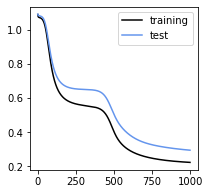

In [8]:
# 리스트 7-1-(8)
# 학습 오차의 표시 ---------------------------
plt.figure(1, figsize=(3, 3))
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label ='test')
plt.legend()
plt.show()

#### 결과 해석
- 하급 프로그램이 잘 작동한다면 훈련 데이터의 오차가 단조롭게 감소하여 일정한 값으로 수렴하고 있음을 확인할 수 있을 것이다.
- 학습에 사용하지 않은 테스트 데이터의 오차도 도중에 오르지 않고 단순하게 떨어지고 있으면 오버 피팅은 일어나지 않았다고 해석할 수 있다.
- 400단계 부근에서 학습이 수렴한 것처럼 보이지만, 또 급격히 학습이 진행되고 있다. 

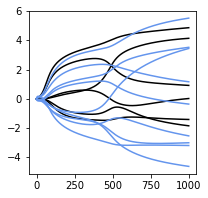

In [9]:
# 리스트 7-1-(9)
# 가중치의 시간 변화의 표시 ---------------------------
plt.figure(1, figsize=(3, 3))
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
plt.show()

- 가중치의 시간 변화도를 시각화하였다.
- 중간층의 가중치 w를 검정으로, 출력층의 가중치 v를 파란색으로 표시했다.
- 0 주변의 기본값으로 시작된 가중치는 각각 특정 값으로 서서히 수렴하고 있다.
- 그러나 자세히 살펴보면 400단게 부근에서 각각의 가중치 그래프가 교차하고 있다.
- 이것은 가중치를 갱신하는 방향, 즉 오차 함수의 기울기의 방향이 변화하는 것을 의미한다. 
- 가중치가 안장점이라는 지점 근처를 통과했기 때문일지도 모른다. 

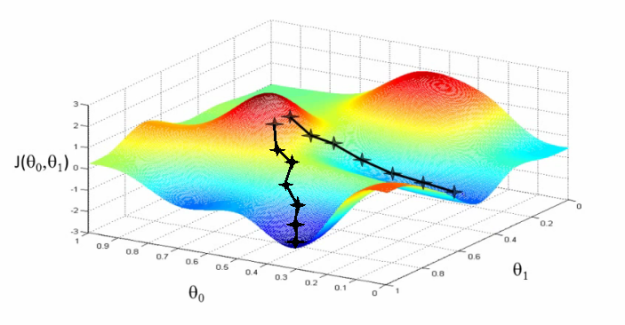

#### 안장점이란?
어느 방향은 계곡, 다른 방향으로는 산이 되는 지점, 즉  어느 방향에서 보면 극댓값이고, 다른 방향에서 보면 극솟값이 되는 점이다.
가중치 공간이 15차원이므로 오차 함수를 그릴 수는 없지만 만약 2차원일 때의 안장점의 이미지를 그리면 다음과 같다. 경사 하강법에 따라 가중치는 계곡의 중심을 향해 나아가고 있지만 중심에 가까워질수록 기울기는 작아지고, 갱신도 느려진다. 그러나 어느 정도 진행되면 거기에서 점차 방향이 변화하고, 또한 갱신이 가속된다.

신경망에 의해 만들어지는 오차함수의 지형은 복잡하다. 비선형성이 강한 신경망의 경우는 일단 학습이 수렴해도 멈추지 않고 더 노력하면 학습이 단숨에 진행되는 경우가 많다. 신경망의 학습 단계 수를 결정하는 것은 어려운 문제이다.

그런데, 오차와 가중치만으로는 네트워크가 정말로 학습했다는 실감이 나지 않는다. 그래서 데이터 공간을 클래스 0,1,2로 판정하는 영역의 경계를 표시해보자. 다음 show_FNN 은 가중치 매개 변수 wv를 전달하면, 표시할 입력 공간을 60x60으로 분할하고, 모든 입력에 대한 네트워크 출력을 확인한다. 그리고 각각의 카테고리에는 0.5, 0.9이상의 출력을 얻을 수 있는 영역을 등고선으로 표시한다. 

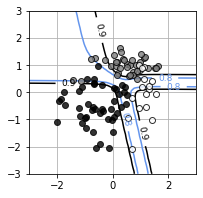

In [10]:
# 리스트 7-1-(10)
# 경계선 표시 함수 ----
def show_FNN(wv, M, K) :
    xn = 60 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)

    x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')] # 1 -> 'F'
    y, a, z, b = FNN(wv, M, K, x)

    plt.figure(1, figsize = (4, 4))
    for ic in range(K) :
        f = y[:, ic]
        f = f.reshape(xn, xn)
        f = f.T
        cont = plt.contour(xx0, xx1, f, levels = [0.8, 0.9], colors = ['cornflowerblue', 'black'])
        cont.clabel(fmt = '%1.1f', fontsize = 9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)

# 경계선 표시 ----
plt.figure(1, figsize = (3, 3))
Show_data(X_test, T_test)
show_FNN(WV, M, K)
plt.show()

- 학습에 사용하지 않은 테스트 데이터 상에서도 경계선을 잘 그리는 것을 확인
- 수치 미분은 실행 속도가 느리다. 이제 편미분을 해석적으로 구하고 실행 속도를 빠르게 해보자.

#### 7.2.5 오차 역전파법
- 피드 포워드 신경망에 학습시키는 방법으로 오차 역전파법이 유명하다.
- 이 오차 역전파법은 네트워크의 출력에서 발생하는 오차(지도 신호와의 차이)의 정보를 사용하여, 출력층의 가중치 $V_{kj}$에서 중간층에 가중치 $W_{ji}$으로 입력 방향의 반대로 가중치를 갱신해 나가기 때문에 이러한 이름이 붙었다.
- 사실 오차 역전파법은 경사 하강법이다. 경사 하강법을 피드 포워드 네트워크에 적용하면 오차 역전파법이 자연스럽게 도출된다.

- 경사 하강법을 적용하기 위해 오차 함수를 매개 변수로 편미분한다.
- 우선 네트워크는 클래스 분류를 하기 때문에 오차 함수는 평균 교차 엔트로피 오차를 생각한다.
$$ E(w,v) = $ -\frac {1}{N}\displaystyle\sum_{n=0}^{N-1}\displaystyle\sum_{k=0}^{k-1}t_{nk}ln(y_{nk}) $$

우선 하나의 데이터 n에만 해당하는 상호 엔트로피 오차를 정의한다.
$$ E_n(w,v) = $ -\displaystyle\sum_{k=0}^{k-1}t_{k}ln(y_{k}) $$

그리고 다음과 같이 식을 나타낸다. 
$$ E(w,v) = $ \frac {1}{N}\displaystyle\sum_{n=0}^{N-1}E_{n}(w,v) $$

즉, 평균 상호 엔트로피 오차는 데이터 각각의 상호 엔트로피 오차의 평균으로 해석된다. 경사 하강법에서 사용하는 E의 매개 변수의 편미분은, 에를 들어 $ \partial E / \partial w_{ji} $ 을 고려했을 때 합과 미분은 교환할 수 있기 때문에 각 데이터에 대해 구하여 평균을 하면 본래 목적인 $ \partial E / \partial w_{ji} $를 구할 수 있다. 

$$\frac {\partial E}{\partial w_{ji}}$ = $\frac {\partial}{\partial w_{ji}} \frac {1}{N}\displaystyle\sum_{n=0}^{N-1}E_n$ 
= $\frac {1}{N}\displaystyle\sum_{n=0}^{N-1}{\partial E_n}{\partial w_{ji}}$$

네트워크 매개 변수는 w뿐만 아니라 v도 있다. 여기서는 D=2, M=2, K=3의 경우를 상정하여 우선 En을 ykj로 편미분한 식을 구하고 다음으로 En을 wkj로 편미분한 식을 구하는 순서로 유도하고 있다.

#### 7.2.6 $\partial E_{n} / \partial V_{kj}$를 구하기

#### 7.2.8 오류 역전파법의 구현

- 이제 경사 하강법, 즉 오차 역전파법으로 $\partial E / \partial w$ 및 $\partial E / \partial v$를 구하는 프로그램을 만들자.
- 함수 이름은 dCE_FNN 으로 한다.
- 입력하는 정보는 CE_FN와 동일하다.
- $\partial E / \partial w$ 및 $\partial E / \partial v$는 프로그램에서 각각 dw, dv로 하고 있으며 함수의 출력은 이들을 결합한 dwv로 한다. 

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


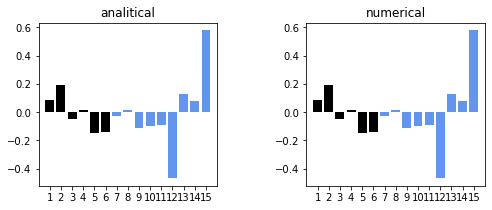

In [11]:
# 리스트 7-1-(11)
# -- 해석적 미분 -----------------------------------
def dCE_FNN(wv, M, K, x, t):
    N, D = x.shape
    # wv을 w와 v로 되돌림
    w = wv[:M * (D + 1)]
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):]
    v = v.reshape((K, M + 1))
    # ① x를 입력하여 y를 얻음
    y, a, z, b = FNN(wv, M, K, x)
    # 출력 변수의 준비
    dwv = np.zeros_like(wv)
    dw = np.zeros((M, D + 1))
    dv = np.zeros((K, M + 1))
    delta1 = np.zeros(M) # 1층 오차
    delta2 = np.zeros(K) # 2층 오차(k = 0 부분은 사용하지 않음)
    for n in range(N): # (A)
        # ② 출력층의 오차를 구하기
        for k in range(K):
            delta2[k] = (y[n, k] - t[n, k])
        # ③ 중간층의 오차를 구하기
        for j in range(M):
            delta1[j] = z[n, j] * (1 - z[n, j]) * np.dot(v[:, j], delta2)
        # ④ v의 기울기 dv를 구하기
        for k in range(K):
            dv[k, :] = dv[k, :] + delta2[k] * z[n, :] / N
        # ④ w의 기울기 dw를 구하기
        for j in range(M):
            dw[j, :] = dw[j, :] + delta1[j] * np.r_[x[n, :], 1] / N
    # dw와 dv를 합체시킨 dwv로 만들기
    dwv = np.c_[dw.reshape((1, M * (D + 1))), \
                dv.reshape((1, K * (M + 1)))]
    dwv = dwv.reshape(-1)
    return dwv


#------Show VW
def Show_dWV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3],
            align="center", color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:],
            align="center", color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)
    
    
#-- 동작 확인
M = 2
K = 3
N = 2
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)


dWV_ana = dCE_FNN(WV, M, K, X_train[:N, :], T_train[:N, :])
print("analytical dWV")
print(dWV_ana)


dWV_num = dCE_FNN_num(WV, M, K, X_train[:N, :], T_train[:N, :])
print("numerical dWV")
print(dWV_num)


plt.figure(1, figsize=(8, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
Show_dWV(dWV_ana, M)
plt.title('analitical')
plt.subplot(1, 2, 2)
Show_dWV(dWV_num, M)
plt.title('numerical')
plt.show()

- 동작 확인을 위해 임의로 생성한 가중치 매개 변수 WV에 대한 해석적 미분값 dWV_ana를 출력하고 이전에 작성한 수치 미분값 dWV_num도 표시한다.
- 해석적 미분값은 7.2.3절에서 계산한 수치 미분값과 거의 일치한다. 그래프로 나타내도 거의 동일하다.
- 이제 분석 미분이 제대로 계산되어 있었던 것이 확인되었다.
- 루프 (A)에서 n번 반복되고, 각 반복에서 얻을 수 있는 모든 dv를 합해 평균을 계산한다.

---------------
- 수치 미분으로 풀어본 분류 문제를 오차 역전파법으로 풀어보자.
- 함수 Fit_FNN은 수치 미분의 경우 Fit_FNN_num과 거의 동일하며, 수치 미분 dCE_FNN_num을 사용하고 있던 부분을 방금 작성한 dCE_FNN으로 바꿀 뿐이다. 

In [12]:
# 리스트 7-1-(12)
import time


# 해석적 미분을 사용한 구배법 -------
def Fit_FNN(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wv = wv_init.copy()
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n):
        wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train) # (A)
        err_train[i] = CE_FNN(wv, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
        wv_hist[i, :] = wv
    return wv, wv_hist, err_train, err_test


# 메인 ---------------------------
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000
alpha = 1
WV, WV_hist, Err_train, Err_test = Fit_FNN(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:27.793 sec


- 수치 미분에 의한 계산은 훨씬 빨리 끝났다. (약 8.5배)
- 이 결과를 다음과 같이 시각화하였다. 

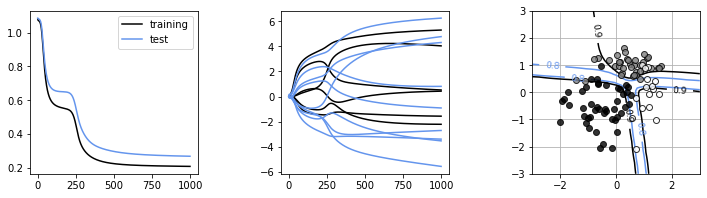

In [13]:
# 리스트 7-1-(13)
plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)
# 학습 오차의 표시 ---------------------------
plt.subplot(1, 3, 1)
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()
# 가중치의 시간 변화 표시 ---------------------------
plt.subplot(1, 3, 2)
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
# 경계선 표시 --------------------------
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
M = 2
K = 3
show_FNN(WV, M, K)
plt.show()

- 수치 미분 때와 거의 같은 결과를 얻었다.
- 이 신경망은 최소 사이즈이지만, 네트워크의 규모가 커질수록 미분 계산 속도의 중요성은 더해간다.
- 수치 미분은 도출된 미분 방정식이 맞는지 확인하는 강력한 도구가 된다. 
- 새로운 오차 함수의 미분 방정식을 구할 경우에는 먼저 수치 미분으로 올바른 값을 구해두는게 좋다.

#### 지금까지의 주요 프로그램 정리
- Fit_FNN: 네트워크 매개 변수를 구하는 프로그램의 본체
- X_train과 T_train에서 wv를 학습시키고 X_test와 T_test로 평가한다.
- 이 가운데는 크로스 엔트로피를 줄이는 wv를 구하기 위해 크로스 엔트로피를 구하는 CE_FNN과 미분 dCE_FNN이 사용되고 있다.
- 또 두 함수에서 네트워크의 출력 FNN이 사용되고 있다.
- FNN에는 중간층 뉴런의 활성화 함수로 Sigmoid가 사용되고 있다.
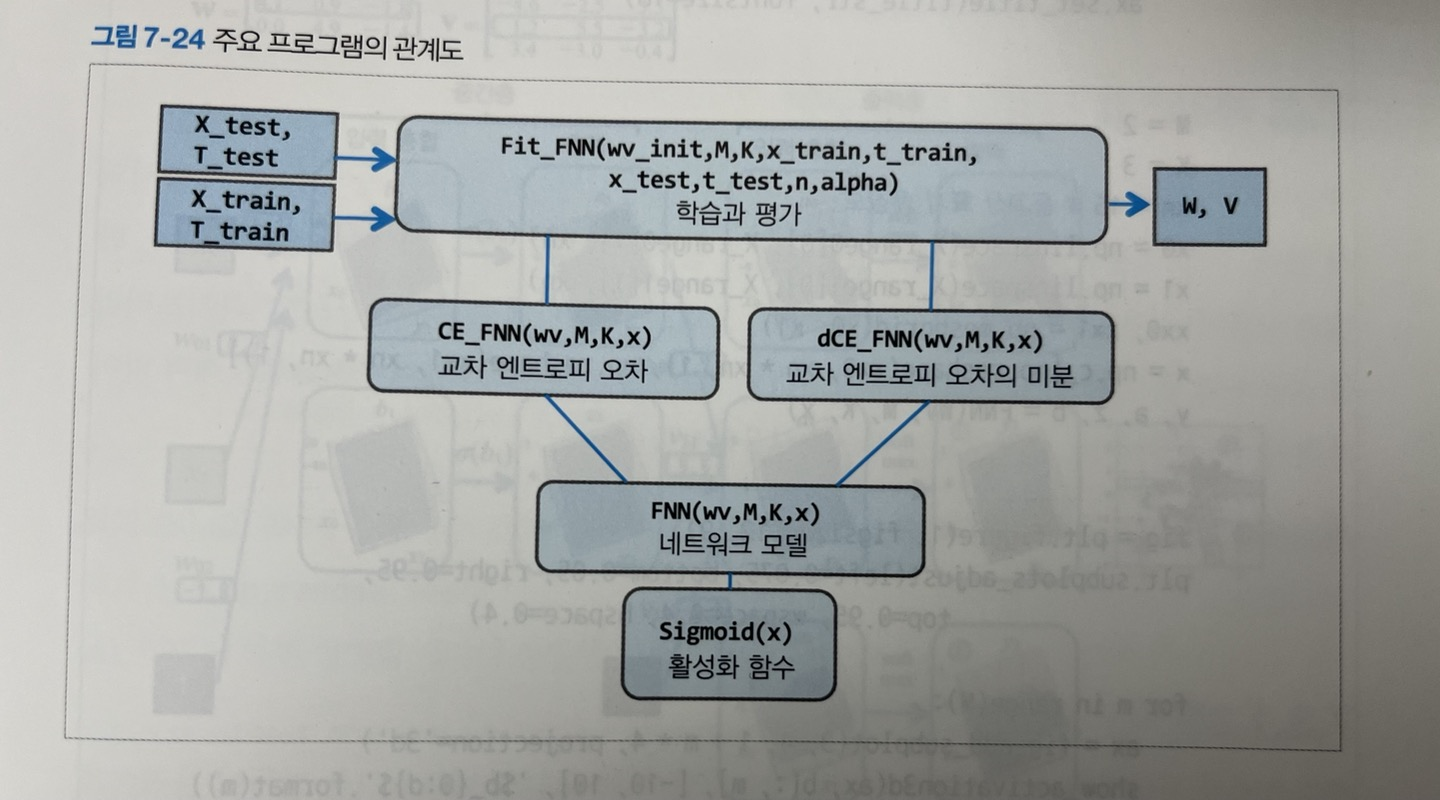

#### 7.2.9 학습 후 뉴런의 특성

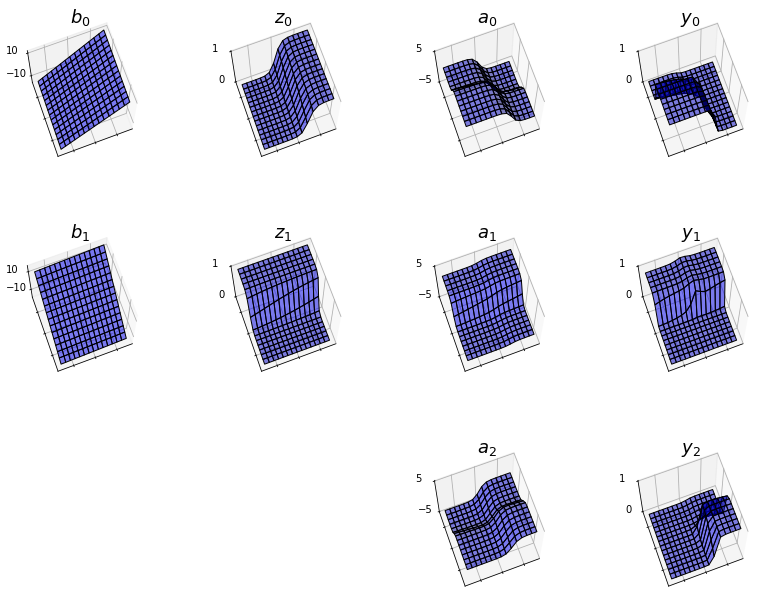

In [14]:
# 리스트 7-1-(14)
from mpl_toolkits.mplot3d import Axes3D

def show_activation3d(ax, v, v_ticks, title_str) :
    f = v.copy()
    f = f.reshape(xn, xn)
    f = f.T

    ax.plot_surface(xx0, xx1, f, color = 'blue', edgecolor = 'black', rstride = 1, cstride = 1, alpha = 0.5)
    ax.view_init(70, -110)

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticks(v_ticks)
    ax.set_title(title_str, fontsize = 18)

M = 2
K = 3
xn = 15 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)

x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')] # 1 -> 'F'
y, a, z, b = FNN(WV, M, K, x)

fig = plt.figure(1, figsize = (12, 9))
plt.subplots_adjust(left = 0.075, bottom = 0.05, right = 0.95, top = 0.95, wspace = 0.4, hspace = 0.4)

for m in range(M) :
    ax = fig.add_subplot(3, 4, 1 + m * 4, projection = '3d')
    show_activation3d(ax, b[:, m], [-10, 10], '$b_{0:d}$'.format(m))

    ax = fig.add_subplot(3, 4, 2 + m * 4, projection = '3d')
    show_activation3d(ax, z[:, m], [0, 1], '$z_{0:d}$'.format(m))


for k in range(K) :
    ax = fig.add_subplot(3, 4, 3 + k * 4, projection = '3d')
    show_activation3d(ax, a[:, k], [-5, 5], '$a_{0:d}$'.format(k))
  
    ax = fig.add_subplot(3, 4, 4 + k * 4, projection = '3d')
    show_activation3d(ax, y[:, k], [0, 1], '$y_{0:d}$'.format(k))

plt.show()

#### 결과해석
- 각 그래프는 다양한 x0, x1의 쌍이 입력된 경우 각 변수의 값을 나타낸다
- 중간층 입력 총합 bj는 입력 xi의 선형 합이므로 입출력 맵은 평면이다.
- w에 의하여 면의 기울기가 결정된다.
- 입력 총합 bj의 입출력 맵은 시그모이드 함수를 빠져나가면 낮은 부분과 높은 부분이 각각 0과 1 범위에 넣어진 출력 zj가 된다.

- 출력층의 입력 총합 ak의 입출력 맵은 z0, z1 의 두 입출력 맵의 선형 합으로 이루어진다.
- 예를 들어 a1의 맵은 z0의 맵을 1,2배 한 것과 z1의 맵을 5.5배 한 것을 더하여, 마지막으로 전체를 3.2가 만들어지고 있ㄷ.ㅏ
- 확실히 a1의 맵은 z0과 z1로 되풀이한 특징을 가지고 있다. 
- a0 및 a1의 맵은 z0과 z1의 조합에 의해 만들어지는 것을 알 수 있다. 

- a는 소프트맥스 함수를 지나 0~1의 범위로 늘려 뭉게져 Yk가 만들어진다.
- $y_0, y_1, y_2$가 솟아오르는 부분은 각 클래스 0,1,2로 분류되는 범위에 대응하고 있다.
- 소프트맥스 함수에서 처리된 결과이므로 0,1,2의 면을 모두 더하면 높이가 1인 평면이 된다.
- 출력층은 중간층 뉴런을 기저 함수로 선형 소프트맥스 모델로 간주될 수 있다.
- 하지만 신경망 모델의 경우는 기저 함수의 특성도 학습에 의해 자동으로 최적화되는 특별한 선형 소프트맥스 모델이다. 

### 7.3 케라스로 신경망 모델 구현

지금까지 신경망 프로그램을 스스로 만들어봤지만 현재 신경망의 다양한 라이브러리가 출시되고 있어 이를 사용하면 대규모 신경망이 비교적 짧은 코드로 구현되며 빠르게 동작한다. 한 예로 구글에서 개발한 텐서플로가 유명하다. 그리고 2015년에 출시된 케라스 라이브러리를 사용하면 텐서플로를 쉽게 동작시킬 수 있다. (래퍼 라이브러리 라고 한다.) 여기서는 캐라스를 사용해보겠다.

In [15]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [44]:
import platform
print(platform.python_version())

3.7.11


In [45]:
!pip install tensorflow==1.3.0

ERROR: Could not find a version that satisfies the requirement tensorflow==1.3.0 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.8.0rc0, 2.8.0rc1, 2.8.0)
ERROR: No matching distribution found for tensorflow==1.3.0


In [38]:
!pip install keras==2.0.8

  Attempting uninstall: keras
    Found existing installation: Keras 2.1.2
    Uninstalling Keras-2.1.2:
      Successfully uninstalled Keras-2.1.2


- 필요한 라이브라리를 import 하고 저장된 데이터를 load한다. 

In [ ]:
# 리스트 7-2-(1)
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(1) # (A)
import keras.optimizers #(B)
from keras.models import Sequential # (C)
from keras.layers.core import Dense, Activation #(D)

# 데이터 로드 ----
outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']

X_test = outfile['X_test']
T_test = outfile['T_test']

X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']

(A): np. random.seed(1)은 케라스 내부에서 사용되는 난수를 초기화하는 코드

(B),(C),(D)에서 케라스 관계의 라이브러리를 import 하고 있다.

- 다음으로, 이전에 정의한 데이터를 그림으로 그리는 함수 재정의

In [30]:
# 리스트 7-2-(2)
# 데이터를 그리기 ------------------------------
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1],
                 linestyle='none', marker='o',
                 markeredgecolor='black',
                 color=c[i], alpha=0.8)
    plt.grid(True)

- 케라스를 사용하여 7.2절에서 구축한 2층 피드백 신경망 모델을 만들고 학습시킴

In [29]:
# 리스트 7-2-(3)
# 난수 초기화
np.random.seed(1)

# ---- Sequential 모델 자석
model = Sequential()

model.add(Dense(2, input_dim = 2, activation = 'sigmoid', kernel_initializer = 'uniform')) # (A)
model.add(Dense(3, activation = 'softmax', kernel_initializer = 'uniform')) # (B)
sgd = keras.optimizers.SGD(lr = 1, momentum = 0.0, decay = 0.0, nesterov = False) # (C)

model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy']) # (D)

# ---- 학습
startTime = time.time()
history = model.fit(X_train, T_train, epochs = 1000, batch_size = 100, verbose = 0, validation_data = (X_test, T_test)) # (E)

# ---- 모델평가
score = model.evaluate(X_test, T_test, verbose = 0) # (F)
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'.format(score[0], score[1]))

calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

cross entropy 0.26, accuracy 0.90
Calculation time:15.381 sec


- 7.2절에서 꾸준히 만든 기능이 간결한 프로그램으로 실현되었다.
- 학습에서 얻은 최종적인 교차 엔트로피 오차는 0.30으로, 0.88의 정답률을 얻을 수 있었다.

이 model은 변수가 아닌 sequential 클래스에서 생성된 객체 이다. 객체는 여러 변수와 함수를 묶은 것이다.

케라스는 이 model에 층을 추가해 네트워크의 구조를 정의한다. 

먼저 이 model에 중간층으로 Dense 라는 전결합형의 층을 추가한다.

In [ ]:
model.add(Dense(2, input_dim= 2, activation = 'sigmoid', kernel_initializer = 'uniform'))

- Dense의첫 번째 인수 2는 뉴런의 수이다. 
- input_dim=2는 입력의 차원이 2임을 의미한다.
- activation= 'sigmoid'는 활성화 함수로 sigmoid함수를 사용하라는 지시이다.
- kernel_initializer = 'uniform' 은 가중치 매개 변수의 초기값을 균일 난수에서 결정한다는 의미이다.
- 더미 입력(바이어스)는 기본적으로 설정되어 있다.

In [ ]:
model.add(Dense(3, activation='softmax', kernel_initializer = 'uniform'))

- Dense()의 인수 3은 뉴런 수를 activation = 'softmax'는 활성화 함수로 소프트맥스를 사용한다는 의미
- kernel_initializer = 'uniform'로 가중치 매개 변수를 균일 난수로 한다.
- 이것으로 네트워크 구조의 정의는 끝

- 다음은 학습 방법의 설정을 keras.optimizer.SGD()에서 실시해 그 내용을 sgd에 넣는다.

In [ ]:
sgd= keras.optimizers.SGD(lr= 0.5, momentum = 0.0, decay = 0.0, nesterov= False)

- 순수한 경사 하강법으로 대응하도록 설정했다.
- lr은 학습 속도이다.
- 이 sgd 을 model.compile()에 전달하여 학습 방법의 설정이 이루어진다.

In [ ]:
model.compile(optimizer= sgd, loss= 'categorical_crossentropy', metrics = ['accuracy'])

- loss= 'categorical_crossentropy': 목적 ㅎ마수를 교차 엔트로피 오차로 지정
-  metrics = ['accuracy']): 학습의 평가 지표로 정답률을 계산하도록 지시
- 정답률은 예측의 확률이 가장 높은 클래스를 예측할 때 모든 클래스에 대해 몇 %가 정딥인지의 비율
- 실제 학습은 model.fit()으로 실행한다. 

In [ ]:
history = model.fit(X_train, T_train, batch_size = 100, epochs = 1000, verbose = 0, validation_data = (X_test, T_test))

- model.fit의 인수 X_train, T_train은 훈련 데이터를 지정
- batch_size= 100은 1단계 분의 기울기를 계산하는 데 사용하는 학습 데이터의 수
- epochs = 1000은 전체 데이터를 학습에 사용한 횟수
- verbose=0은 학습 진행 상황을 표시하지 않음
- validation_data = (X_test, T_test)는 평가용 데이터의 지정
- 출력의 history는 학습 과정의 정보가 들어있음

- 마지막의 model.evaluate()에서 최종 학습의 평가 값을 출력
- score[0]은 테스트 데이터의 상호 엔트로피 오차, score[1]은 테스트 데이터의 정답률이다.
- 학습 과저아을 그래프로 시각화하였다.

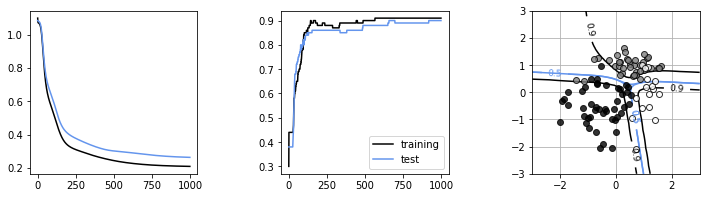

In [31]:
# 리스트 7-2-(4)
plt.figure(1, figsize = (12, 3))
plt.subplots_adjust(wspace = 0.5)

# 학습 곡선 표시 ----
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'black', label = 'training') # (A)
plt.plot(history.history['val_loss'], 'cornflowerblue', label = 'test') # (B)

# 정확도 표시 ----
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], 'black', label = 'training') # (C) 'acc' -> 'accuracy'
plt.plot(history.history['val_accuracy'], 'cornflowerblue', label = 'test') # (D) 'val_acc' -> 'val_accuracy'
plt.legend()

# 경계선 표시 ----
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
xn = 60 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)

x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')] # 1 -> 'F'
y = model.predict(x) #(E)

K = 3
for ic in range(K) :
  f = y[:, ic]
  f = f.reshape(xn, xn)
  f = f.T

  cont = plt.contour(xx0, xx1, f, levels = [0.5, 0.9], colors = ['cornflowerblue', 'black'])
  cont.clabel(fmt = '%1.1f', fontsize = 9)
  plt.xlim(X_range0)
  plt.ylim(X_range1)

plt.show()

- 학습 과정의 훈련 데이터의 교차 엔트로피 오차의 시계열 정보는 history.history['loss'] 에서 참조할 수 있다.
- 훈련 데이터의 교차 엔트로피 오차는 history.history['val_loss'] 에서 볼 수 있다.

- 마찬가지로 훈련 데이터의 정답률은 history.history['acc']에서 볼 수 있으며 테스트 데이터의 정답률은 history.history['val_acc']에서 볼 수 있다.

- 학습이 완료된 모델에 의한 임의의 입력 x에 대한 예측은 model.predict(x)에서 얻을 수 있다.
- 입력 x는 X_train 처럼 데이터를 묶은 행렬로, 출력 또한 이에 대응하는 행렬이 된다.

- 실행 결과를 보면 훈련 데이터의 오차가 빠르게 감소하는 것을 알 수 있다.
- 또한 테스트 데이터의 오차도 증가하고 있지 않기 때문에 오버피팅은 일어나지 않았다고 할 수 있다.
- 훈련 데이터와 학습 데이터의 정답률을 보면 학습이 잘 이루어지면 정답률은 1에 다가가는데 목적 함수와는 다르기 때문에 때로는 감소가 일어나기도 한다.
- 정답률을 통해 성능을 직관적으로 알 수 있으므로 네트워크의 성능 평가에 자주 사용된다.
- 가장 오른쪽 그래프는 학습한 모델의 카테고리 간 경계를 잘 나타내고 있다.

-------------------
# AFTER

#### Q. 수치해와 해석해 차이
`해석해`: 미적분 등 수학적 기법을 사용하여 정확한 해를 구하는 방법이다. 

하지만 수학적 기법을 통해 정확한 해를 구하지 못하는 수학적 모델들이 현실에선 많이 존재한다. 

따라서 수치해를 구하게 된다.

`수치해`: 이는 컴퓨터를 이용한 수치적 기법을 사용하여 근사한 해를 구하는 방법이다.

 #### Q. 수치 미분법과 해석 미분법의 차이는?

`해석 미분(Analytical Differentiation)`

: 해석적 미분 방식은 종이와 펜을 이용해 논리적인 전개로 풀 수 있는 문제를 말합니다.

`수치 미분(Numerical Differentiation)`

: 수치적 미분은 해석적 미분 방식으로는 풀 수 없는 문제가 있을 때 수치적 접근을 통해 근사 값을 찾는 방식입니다.


수치 미분은 현실세계에 미분을 적용하기 위한 실용적인 학문으로 수치해석과목에서 자세하게 배울 수 있다.

수치 미분은 아주 작은 차분으로 미분함으로써, 미분 공식과 근사적으로 가까운 결과를 낼 수 있게 해준다. 

예를들어 변화량 dx를 dx = 0.000001로 놓고 미분값을 구하는 것이다.

파이썬에서 구현을 할 시 주의해야할 사항은 변화량인 dx(h) 변수값을 소숫점 8자리 이하로 내리면 안된다는 것이다.

그렇게 되면 반올림 오차 문제로 작은값이 생략되어 잘못된 계산결과가 도출되기 때문이다.

다음과 같이 중앙 차분을 이용해 구현을 해야 된다.



#### Q. 안장점
- 안장점의 수학적 의미

 만약 f가 x0에서 미분이 가능하지 않고, Df(x0) = 0 이라면 점 x0을 임계점(critical point)라고 한다.. 극점(local extremum)이 아닌 임계점(critical point)를 안장점(saddle point)라고 한다.

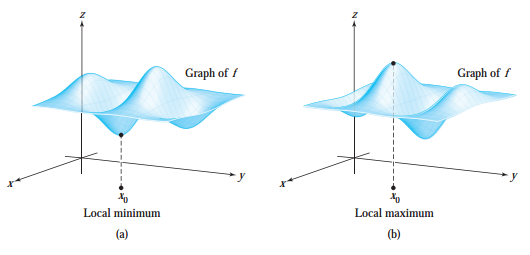

임계점을 잡을 때, 해당 임계점이 지역 최소인지, 최대인지 안장점인지 알아내는 것이 조금 까다롭다.

어느 쪽에서 보느냐에 따라 달라지기 때문이다.

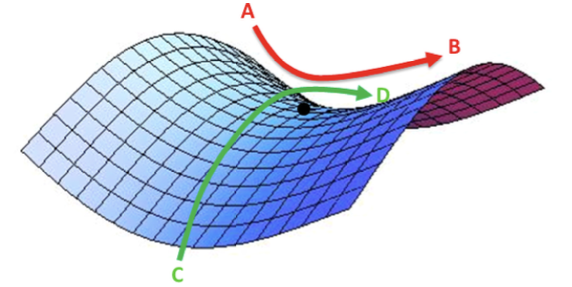


다음 그림을 보면 AB로 보면 지역 최소이고, CD로 보면 지역 최대이기 때문이다.

지역 최소이려면 d차원의 파라미터 공간상에서 d개의 다른 축상 임계점을 통과하도록 잘랐을 때(일차원 부분 공간으로 표현됨) 모든 부분에서 지역 최솟값으로 나타내어진다면, 해당 임계점은 지역 최솟값이 될 것이다.

 

일차원 부분 공간에서는 3가지 중 하나로 나뉠 수 있다는 사실에 착안하면,

d차원에서 임의의 함수의 임게점일 확률은 1/3^d인 것을 알 수 있다.

k개의 임계점을 가진다면, 임의의 함수는 k/3^d개의 지역 최솟값을 가진다고 예상할 수 있다.

 

즉, 이는 다시 말하면 

**함수의 차원이 높을수록 (모델에 파라미터가 많을수록) 지역 최솟값보다 안장점이 기하급수적으로 많을 가능성이 크다.**

 

오차 곡면의 평평한 부분들은 다루기 어렵지만, 궁극적으로 SGD가 좋은 해로 수렴하는 것을 막지는 못한다.